In [ ]:
"""
Author : Mayur ingole
Date : 02-01-2023
Time : 12:56
Version : 01
"""

### EDA

In [1]:
#importing required librarys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#reading dataset
df = pd.read_csv("salary_data_cleaned.csv")

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,age,python_yn,R_yn,spark,aws,asure,cloud,powerBI,Tableau,Excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,50,1,0,0,0,0,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,39,1,0,0,0,0,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,13,1,0,1,0,0,0,0,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,58,1,0,0,0,0,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,25,1,0,0,0,1,1,0,0,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'Job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'asure', 'cloud', 'powerBI', 'Tableau', 'Excel'],
      dtype='object')

In [5]:
## work to do on Dataset >>> 

## 1 . Job title and seniority 

## 2. Fix state Los Angeles 

## 3. Job description length 

## 4. Competitor count

## 5. v hourly wage to annual 

## 6. remove new line from job title

In [6]:
df['Job Title'].value_counts()

Data Scientist                     131
Data Engineer                       53
Senior Data Scientist               34
Data Analyst                        15
Senior Data Engineer                14
                                  ... 
Data Scientist/ML Engineer           1
Sr. Data Scientist                   1
Data Engineer 4 - Contract           1
Data Analyst - Asset Management      1
Machine Learning Engineer (NLP)      1
Name: Job Title, Length: 264, dtype: int64

###  Job title and seniority 

In [7]:

# there are various posts / job title but we need broder category
# making functuion to simplifi job title
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
    
# making function to simplify seniority in job title
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [8]:
# applying functions to job title
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [9]:
df.job_simp.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job_simp, dtype: int64

In [10]:
# applying functions to job title for seniority 
df["seniority"] = df["Job Title"].apply(seniority)

In [11]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [12]:
df.Job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: Job_state, dtype: int64

### fixing Los Angeles

In [13]:
# fixing Los Angeles in job_states column  Los Angeles  City in California >> CA
df["Job_state"] = df.Job_state.apply(lambda x : x.strip() if x.strip().lower() != "los angeles" else "CA")

In [14]:
df.Job_state.value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: Job_state, dtype: int64

In [15]:
#droping columns because columns are totaly zero in it and not giving any information 
df = df.drop("powerBI", axis = 1)
df = df.drop("cloud", axis = 1)
df = df.drop("Tableau", axis = 1)

In [16]:
df.head() # column droped

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,same_state,age,python_yn,R_yn,spark,aws,asure,Excel,job_simp,seniority
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,0,50,1,0,0,0,0,1,data scientist,na
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,0,39,1,0,0,0,0,0,data scientist,na
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,1,13,1,0,1,0,0,1,data scientist,na
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,1,58,1,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,1,25,1,0,0,0,1,1,data scientist,na


In [17]:
# creating new Job description length column
# to find that more / deatil  Job Description means higher salary or lower salary

df["desc_len"] = df["Job Description"].apply(lambda x : len(x))
df["desc_len"]

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

### Competitor count

In [18]:
# making a new column Competitor count how much Competitors dose a company have
df["num_comp"] = df["Competitors"].apply(lambda x : len(x.split(",")) if x != "-1" else 0 )
                                                  # split by "," and counted len of words
                                                  # this will give number of competitor

In [19]:
df["num_comp"]

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

### hourly wage to anual

In [21]:
df["min_salary"] = df.apply(lambda x : x.min_salary * 2 if x.hourly == 1 else x.min_salary ,axis =1 )

In [22]:
df["max_salary"] = df.apply(lambda x : x.max_salary * 2 if x.hourly == 1 else x.max_salary ,axis  =1 )

In [23]:
df[df.hourly == 1][["hourly","min_salary","max_salary"]]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [24]:
df["company_txt"]

0                          Tecolote Research\n3.8
1      University of Maryland Medical System\n3.4
2                                    KnowBe4\n4.8
3                                       PNNL\n3.8
4                         Affinity Solutions\n2.9
                          ...                    
737                                      GSK\n3.9
738                               Eventbrite\n4.4
739           Software Engineering Institute\n2.6
740                             Numeric, LLC\n3.2
741             Riverside Research Institute\n3.6
Name: company_txt, Length: 742, dtype: object

### cleaning ''company_txt'' column

In [25]:
# removing company rating in company name column
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [26]:
df["company_txt"]

0                          Tecolote Research\n
1      University of Maryland Medical System\n
2                                    KnowBe4\n
3                                       PNNL\n
4                         Affinity Solutions\n
                        ...                   
737                                      GSK\n
738                               Eventbrite\n
739           Software Engineering Institute\n
740                             Numeric, LLC\n
741             Riverside Research Institute\n
Name: company_txt, Length: 742, dtype: object

In [27]:
# now there are new line character  we will remove that
df["company_txt"] = df.company_txt.apply(lambda x : x.replace('\n',""))

In [28]:
df["company_txt"] # now company names are clean

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [29]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,asure,Excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,49.389488,0.528302,0.001348,0.225067,0.237197,0.107817,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.962906,0.499535,0.036711,0.417908,0.425651,0.310358,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,14.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,279.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [30]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'Job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'asure', 'Excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

<AxesSubplot: >

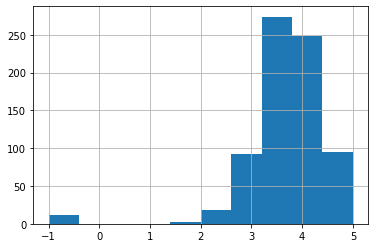

In [31]:
df.Rating.hist() # normaly distrubuted

<AxesSubplot: >

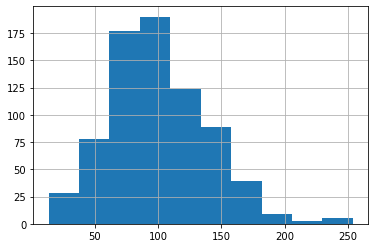

In [32]:
df.avg_salary.hist() 

<AxesSubplot: >

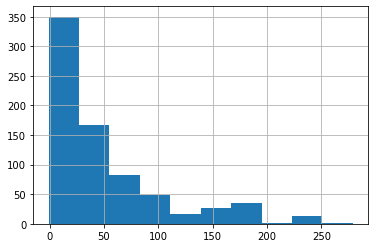

In [33]:
df.age.hist() #Exponential distribution

<AxesSubplot: >

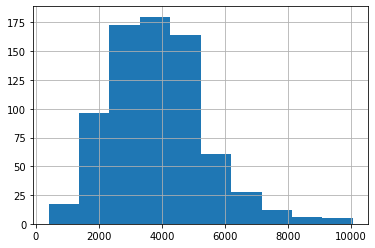

In [34]:
df.desc_len.hist()

<AxesSubplot: >

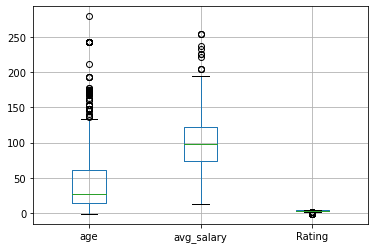

In [35]:
df.boxplot(column = ["age","avg_salary","Rating"])

<AxesSubplot: >

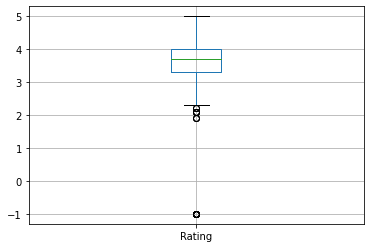

In [36]:
df.boxplot(column = ["Rating"])

In [37]:
#findimng corelation
df[["age","avg_salary","Rating","desc_len"]].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019410,0.026164,0.164730
avg_salary,0.019410,1.000000,0.013492,0.078808
Rating,0.026164,0.013492,1.000000,-0.012281
desc_len,0.164730,0.078808,-0.012281,1.000000


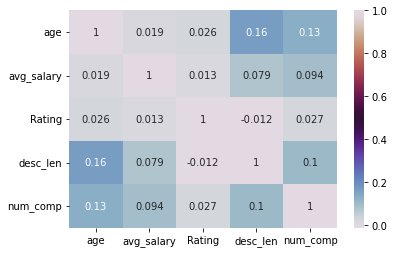

In [38]:
sns.heatmap(df[["age","avg_salary","Rating","desc_len","num_comp"]].corr(), cmap='twilight', annot=True);

In [39]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'Job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'Excel', 'job_simp', 'seniority']]

In [40]:
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,Job_state,same_state,python_yn,R_yn,spark,aws,Excel,job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,0,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,0,0,0,1,data scientist,na


graph for Location: total = 200


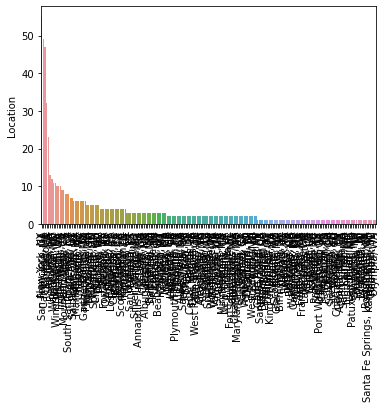

graph for Headquarters: total = 198


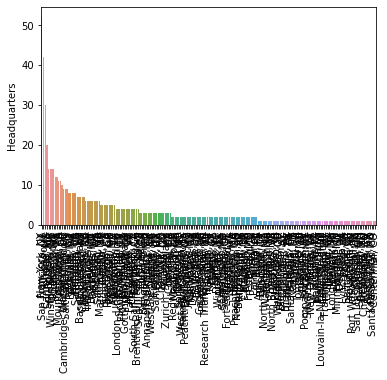

graph for Size: total = 9


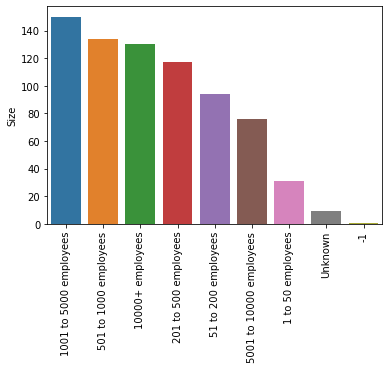

graph for Type of ownership: total = 11


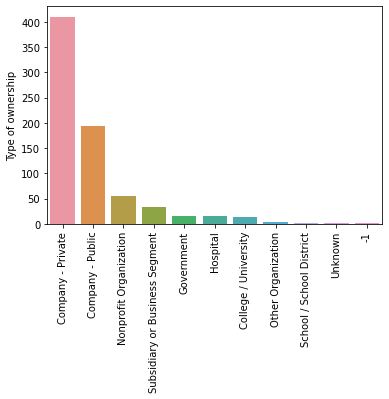

graph for Industry: total = 60


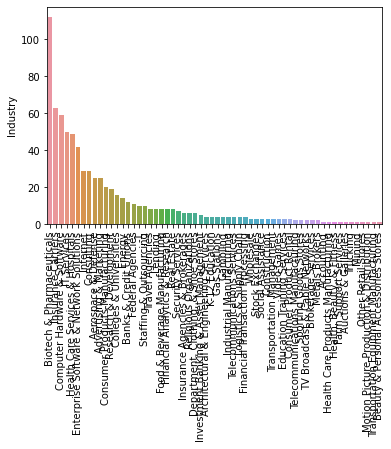

graph for Sector: total = 25


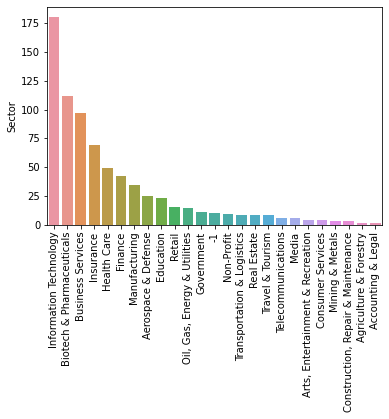

graph for Revenue: total = 14


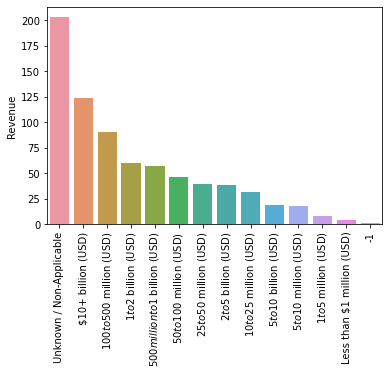

graph for company_txt: total = 343


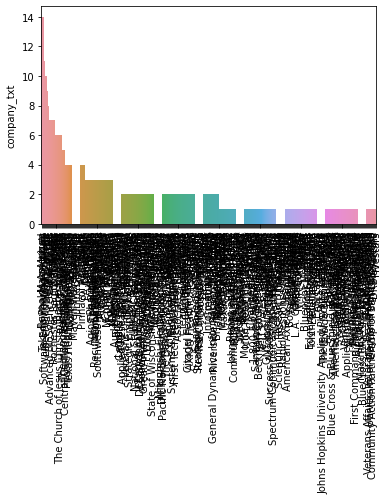

graph for Job_state: total = 37


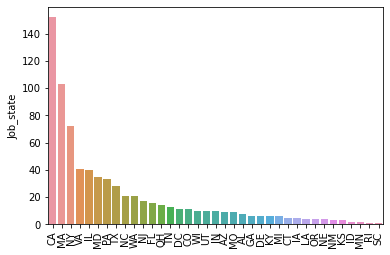

graph for same_state: total = 2


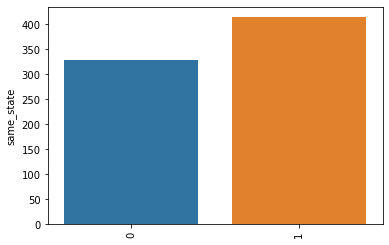

graph for python_yn: total = 2


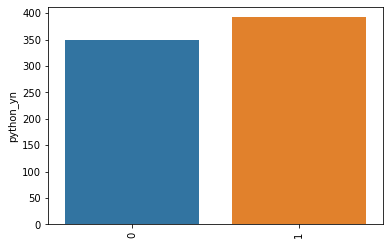

graph for R_yn: total = 2


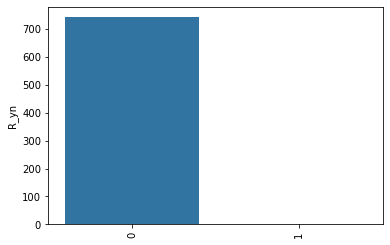

graph for spark: total = 2


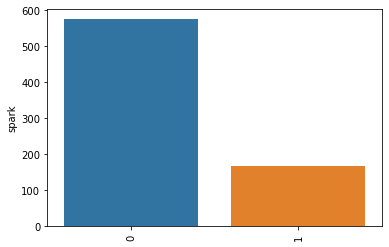

graph for aws: total = 2


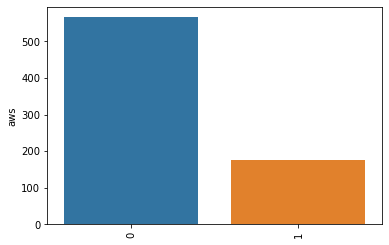

graph for Excel: total = 2


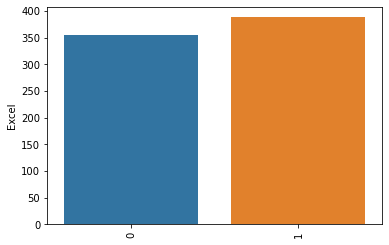

graph for job_simp: total = 7


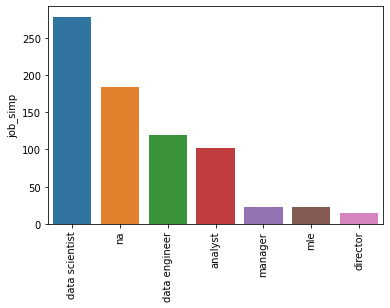

graph for seniority: total = 3


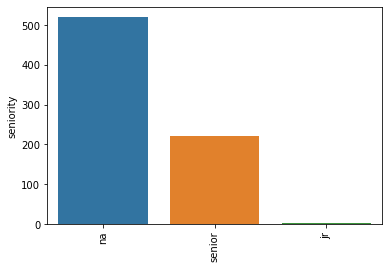

In [41]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


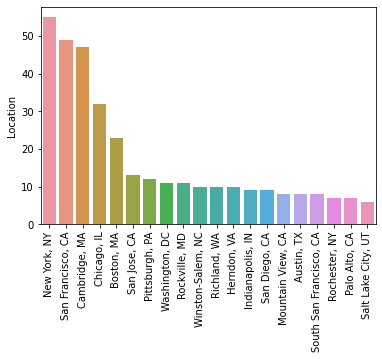

graph for Headquarters: total = 20


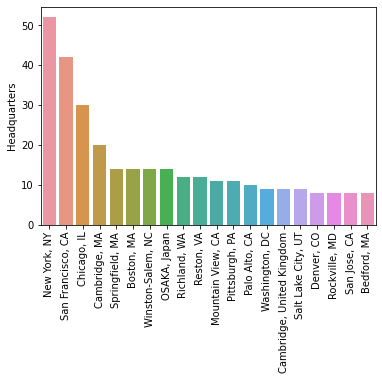

graph for company_txt: total = 20


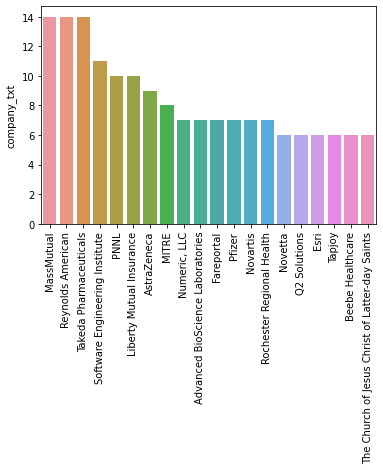

In [42]:
#for top 20
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [43]:
#job salary by position
pd.pivot_table(df,index = "job_simp",values = "avg_salary")

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [44]:
#job salary by position hierarchy
pd.pivot_table(df,index = ["job_simp","seniority"],values = "avg_salary")

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [54]:
#finding which state has higest Pay / avarage salary 
pd.pivot_table(df,index = ["Job_state"] , values = "avg_salary").sort_values("Job_state" , ascending = False)

,avg_salary
Job_state,
WI,73.300000
WA,93.190476
VA,95.621951
UT,94.150000
TX,89.392857
TN,87.115385
SC,60.500000
RI,100.000000
PA,92.560606


In [53]:
#finding which state has higest Pay / avarage salary by job position
pd.pivot_table(df,index = ["Job_state","job_simp"] , values = "avg_salary").sort_values("Job_state" , ascending = False)

avg_salary
Job_state job_simp                  
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [55]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [57]:
#number of jobs per state 
pd.pivot_table(df,index = ["Job_state","job_simp"] , values = "avg_salary" , aggfunc  = "count").sort_values("Job_state" , ascending = False)

avg_salary
Job_state job_simp                  
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [61]:
# exploring data scientist avarage salary in each state
pd.pivot_table(df[df.job_simp == "data scientist"] , index = "Job_state" , values = "avg_salary" ).sort_values("avg_salary" , ascending = False)

,avg_salary
Job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [62]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'Job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'asure', 'Excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [ ]:
# df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [69]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 
                'python_yn', 'R_yn','spark', 'aws', 'Excel', 'Type of ownership','avg_salary']]

In [72]:
#relationship between 'avarage salary' and 'Rating', 'Industry', 'Sector', 'Revenue', 'num_comp',
#'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership'

for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index = i ,values = "avg_salary").sort_values("avg_salary", ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [75]:
# company revenue and they looking for pyhon jobs
pd.pivot_table(df_pivots,index = "Revenue" , columns = "python_yn" , values = "avg_salary", aggfunc = "count")

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [76]:
# wordcloud with job discription to analyse what is important worde in job discription
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

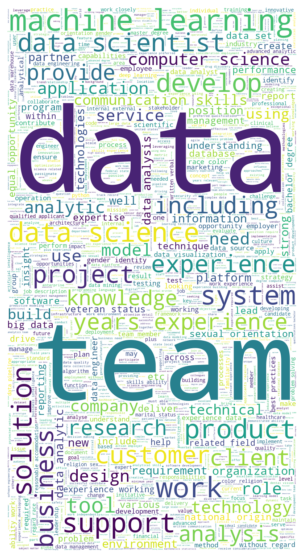

In [77]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [78]:
 # we cleaned "company_txt" column  we removed new line character  and company rating we need updated csv
df.to_csv('salary_data_cleaned_afterEDA.csv',index = False)